## Technical Lesson: RNNs and Time Series Data

### Step 1: Load libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

### Step 2: Load and prepare data

In [6]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)
data = df.values
data = data.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))
data.shape

(144, 1)

### Step 3: Create sequences

In [8]:
seq_size = 12

X = []
y = []

for i in range(seq_size, len(data)):
    X.append(data[i-seq_size:i, 0])
    y.append(data[i, 0])

X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X.shape

(132, 12, 1)

### Step 4: Split data

In [9]:
split = 100

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 12, 1), (100,), (32, 12, 1), (32,))

### Step 5: Build the RNN model

In [11]:
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(seq_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Train the model


In [13]:
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

### Step 7: Evaluate on test data

In [14]:
y_pred = model.predict(X_test)

mse = ((y_pred - y_test)**2).mean(axis=0)
print(f'Test MSE: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Test MSE: [0.01772419 0.01398472 0.03779024 0.04739391 0.01085796 0.01906488
 0.04516713 0.02857052 0.01871854 0.02609337 0.01084353 0.01121383
 0.01157733 0.02709338 0.08602542 0.09812161 0.02296562 0.01084749
 0.01804818 0.01084701 0.0112971  0.01167849 0.01147646 0.02213034
 0.02709338 0.07289267 0.18477443 0.15996483 0.04964188 0.02213034
 0.01179378 0.01336907]


### Step 8: Visualize results

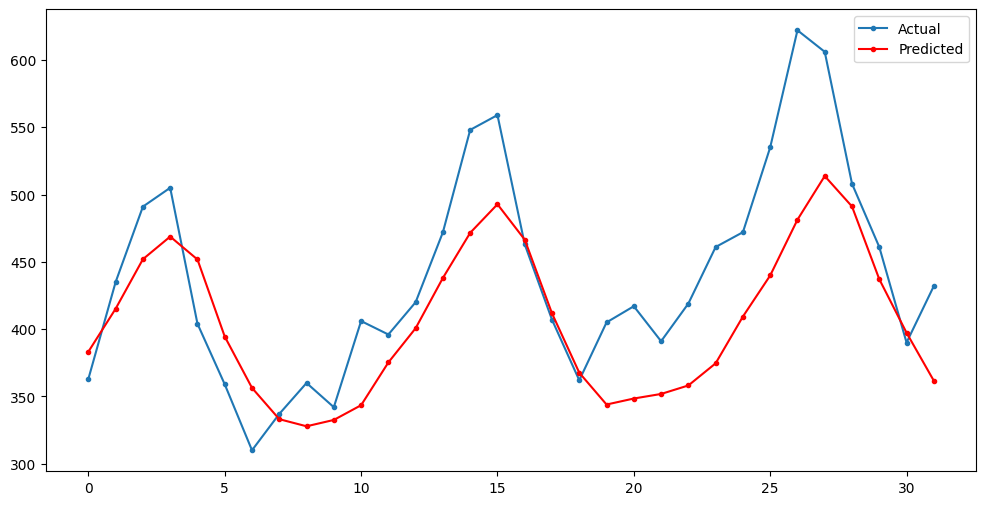

In [15]:
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform([y_test])

plt.figure(figsize=(12,6))
plt.plot(y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(y_pred_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()
plt.show()